# 라이브러리 임포트 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
from matplotlib import font_manager, rc
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pydotplus 

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 호출

In [3]:
data = pd.read_csv('C:/Users/hyunj/Desktop/데이터마이닝 코드/Man_Clustering_Data.csv', encoding='CP949')
data

,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,BMI,cluster
0,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,29.0,54.0,24.0,1.0,1.0,25.39,4
1,130.0,80.0,102.0,158.0,193.0,41.0,79.0,14.8,0.7,21.0,19.0,20.0,1.0,0.0,24.22,3
2,165.0,100.0,97.0,192.0,69.0,79.0,99.0,15.4,0.9,24.0,10.0,46.0,3.0,1.0,27.68,0
3,140.0,80.0,93.0,256.0,148.0,46.0,180.0,16.0,1.1,20.0,22.0,23.0,3.0,1.0,25.95,3
4,136.0,86.0,98.0,209.0,100.0,39.0,150.0,14.0,1.0,28.0,32.0,19.0,2.0,1.0,23.88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33692,125.0,70.0,116.0,184.0,114.0,49.0,112.0,16.9,1.0,20.0,10.0,21.0,3.0,1.0,19.59,2
33693,108.0,76.0,107.0,214.0,97.0,50.0,144.0,15.5,0.7,24.0,24.0,52.0,1.0,1.0,23.88,0
33694,116.0,72.0,103.0,276.0,75.0,75.0,180.0,13.4,0.9,40.0,44.0,25.0,1.0,1.0,22.49,0
33695,120.0,70.0,110.0,224.0,73.0,65.0,144.0,15.1,0.9,24.0,14.0,35.0,2.0,1.0,21.22,0


# 분류

* 기본 하이퍼파라미터

In [5]:
clusters = [0,1,2,3,4]

for cluster in clusters :
    globals()['cluster_{}'.format(cluster)] = data.loc[data['cluster'] == cluster]
    exec('cluster_{}.reset_index()'.format(cluster))
    exec('y = cluster_{}[\'cluster\']'.format(cluster))
    exec('X = cluster_{}.drop([\'cluster\'], axis=1)'.format(cluster))
    exec('X_train_{}, X_test_{}, y_train_{}, y_test_{} = train_test_split(X,y)'.format(cluster, cluster, cluster, cluster))
    
X_train = pd.concat([X_train_0, X_train_1, X_train_2, X_train_3, X_train_4])
X_test = pd.concat([X_test_0, X_test_1, X_test_2, X_test_3, X_test_4])
y_train = pd.concat([y_train_0, y_train_1, y_train_2, y_train_3, y_train_4])
y_test = pd.concat([y_test_0, y_test_1, y_test_2, y_test_3, y_test_4])

dt_clf = DecisionTreeClassifier(max_depth = 5, random_state=0)
dt_clf = dt_clf.fit(X_train, y_train)

# 예측값 저장
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8470
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


* GridSearchCV를 사용한 하이퍼파라미터 튜닝

In [6]:
from sklearn.model_selection import GridSearchCV

depths = [5, 6, 7, 8]
num_leafs = [1, 5, 10, 20, 50, 100]

dtree = DecisionTreeClassifier()
param_grid = [{'max_depth':depths,'min_samples_leaf':num_leafs}]

gs = GridSearchCV(dtree, param_grid=param_grid, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)

df = gs.best_estimator_
print("train_score : {} ".format(df.score(X_train, y_train)))
print("test_score : {} ".format(df.score(X_test, y_test)))
print(gs.best_score_)
print(gs.best_params_)

train_score : 0.9189584899687389 
test_score : 0.891644908616188 
0.8865500781471092
{'max_depth': 8, 'min_samples_leaf': 1}


* 결정트리 시각화

In [8]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
temp = list(data.columns)
temp.remove('cluster')
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot',
               class_names=['0','1', '2', '3', '4'],
               feature_names=temp,
               impurity=False,
               filled=True)

import os
os.environ["PATH"]+=os.pathsep+'C:\Program Files (x86)\Graphviz\bin'
# !pip install graphviz

import graphviz

with open('tree.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
    
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

* Feature Importance 시각화

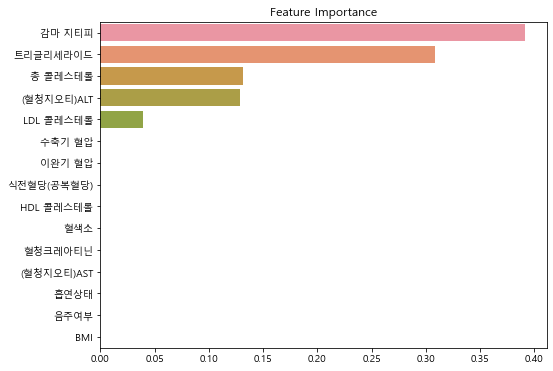

In [9]:
feature_imp = dt_clf.feature_importances_
# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(feature_imp, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()